In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [ ]:
data = pd.read_csv('sample_data/diabetes_prediction_dataset.csv', sep=",")

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
data_train = data

data_train['gender'] = data['gender'].map({
    'Male': 0,
    'Female': 1,
    'Other': 2
})

data_train['smoking_history'] = data['smoking_history'].map({
    'never': 0,
    'current': 1,
    'not current': 2,
    'former': 3,
    'ever': 4,
    'No Info': 5
})

In [ ]:
data_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
1,1,54.0,0,0,5,27.32,6.6,80,0
2,0,28.0,0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,1,23.45,5.0,155,0
4,0,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('diabetes', axis=1)
y = data['diabetes']

# 80% - обучающая, 20% - тестовая
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (80000, 8)
Размер тестовой выборки: (20000, 8)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Метрики модели:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Метрики модели:
Accuracy: 0.9511
Precision: 0.9473039215686274
Recall: 0.452576112412178
F1 Score: 0.6125198098256736


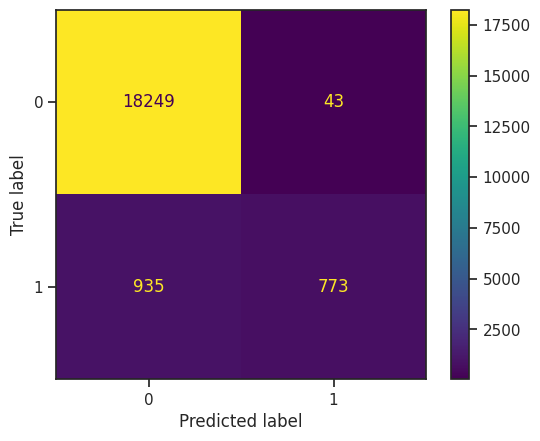

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, StratifiedKFold

model = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 20)}

cv_kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(knn, param_grid, cv=cv_kfold)
random_search = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=10, cv=cv_stratified_kfold)

In [ ]:
grid_search.fit(X, y)
random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(n_neighbors=100),
                   param_distributions={'n_neighbors': range(1, 20)})

In [ ]:
print(grid_search.best_params_)
print(random_search.best_params_)

{'n_neighbors': 7}
{'n_neighbors': 9}


In [ ]:
scores_grid = cross_val_score(grid_search.best_estimator_, X, y, cv=cv_kfold)
scores_random = cross_val_score(random_search.best_estimator_, X, y, cv=cv_stratified_kfold)

print("Средняя точность модели GridSearchCV:", scores_grid.mean())
print("Средняя точность модели RandomizedSearchCV:", scores_random.mean())

Средняя точность модели GridSearchCV: 0.95312
Средняя точность модели RandomizedSearchCV: 0.9526299999999999
